In [1]:
import sys
sys.path.append('/data1/sascha/LOBS5Prediction/s5')
print(sys.path)
from lob.dataloading import create_FI_2010_classification_dataset, create_lobster_prediction_dataset
from lob.fi2010_dataloader import FI2010_Dataset
from lob.lobster_dataloader import LOBSTER_Dataset
from glob import glob
import numpy as np
from tqdm import tqdm
import jax

from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
import matplotlib.pyplot as plt

['/data1/sascha/LOBS5Prediction', '/home/sascha/miniconda3/envs/s5_lob/lib/python311.zip', '/home/sascha/miniconda3/envs/s5_lob/lib/python3.11', '/home/sascha/miniconda3/envs/s5_lob/lib/python3.11/lib-dynload', '', '/home/sascha/miniconda3/envs/s5_lob/lib/python3.11/site-packages', '/data1/sascha/LOBS5Prediction/s5']
gpu


In [2]:
import torch
import torchvision
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

NVIDIA L4


In [3]:
def jax_has_gpu():
    try:
        _ = jax.device_put(jax.numpy.ones(1), device=jax.devices('gpu')[0])
        return True
    except:
        return False
    
jax_has_gpu()

True

In [7]:
(fi12010_dataset, trainloader, valloader, testloader, aux_dataloaders, 
        n_classes, seq_len, in_dim, book_seq_len, book_dim, train_size)=create_FI_2010_classification_dataset(
		cache_dir = "/data1/sascha/data/fi2010_proc",
		msg_seq_len = 100,
		bsz =16,
		horizon = 10,
		horizon_type = 'messages',
		n_data_workers = 0,
        zero_sequences=False
	)

print(n_classes, seq_len, in_dim, book_seq_len, book_dim, train_size)

[*] Generating FI-2010 Prediction Dataset from /data1/sascha/data/fi2010_proc
Using mask function: None
3 100 40 0 0 203701


In [8]:
trainloader.dataset.x[0]

array([[0.2615 , 0.00353, 0.2606 , ..., 0.00311, 0.2579 , 0.00128],
       [0.2615 , 0.00211, 0.2606 , ..., 0.00138, 0.2588 , 0.00123],
       [0.2614 , 0.00122, 0.2606 , ..., 0.00311, 0.2588 , 0.00123],
       ...,
       [0.2626 , 0.00326, 0.2617 , ..., 0.00147, 0.2602 , 0.00395],
       [0.2626 , 0.002  , 0.2617 , ..., 0.00138, 0.2602 , 0.00395],
       [0.2627 , 0.00399, 0.2617 , ..., 0.002  , 0.2602 , 0.00395]])

Text(0.5, 0, 'OB entry')

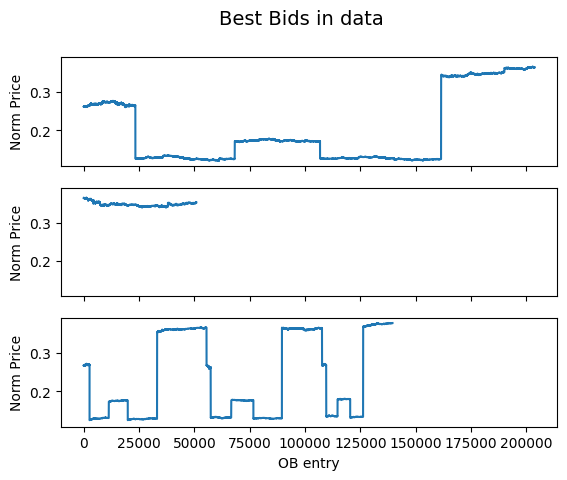

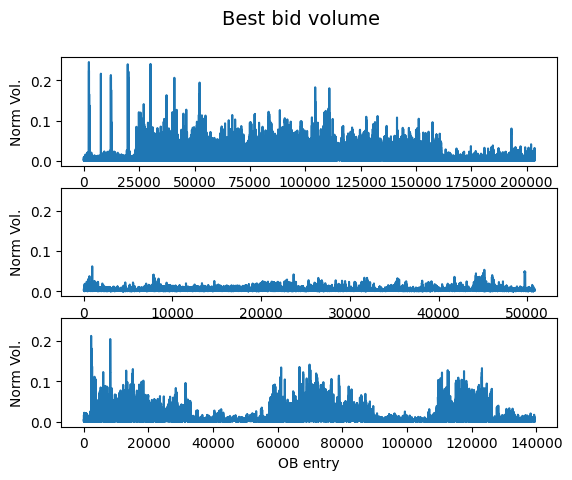

In [9]:
for x,y,z in trainloader:
    #print(x)
    #print(y)
    #print(x.shape, y.shape)
    break
fig,ax=plt.subplots(3,1,sharey='all',sharex='all')
fig.suptitle('Best Bids in data', fontsize=14)
ax[0].plot(trainloader.dataset.x[:,1,0])
ax[1].plot(valloader.dataset.x[:,1,0])
ax[2].plot(testloader.dataset.x[:,1,0])
for a in ax:
    a.set_ylabel("Norm Price")
ax[2].set_xlabel('OB entry')

fig,ax=plt.subplots(3,1,sharey='all')
fig.suptitle('Best bid volume', fontsize=14)

ax[0].plot(trainloader.dataset.x[:,1,1])
ax[1].plot(valloader.dataset.x[:,1,1])
ax[2].plot(testloader.dataset.x[:,1,1])
for a in ax:
    a.set_ylabel("Norm Vol.")
ax[2].set_xlabel('OB entry')

In [ ]:
%timeit trainloader.dataset.__getitems__(jax.numpy.array([45,56,76,85,9765,86,45,56,76,85,9765,86,45,56,76,85]))

In [ ]:
%timeit trainloader.dataset.__getitem__(56)

In [ ]:
(lobster_dataset, trainloader, valloader, testloader, aux_dataloaders, 
        n_classes, seq_len, in_dim, book_seq_len, book_dim, train_size)=create_lobster_prediction_dataset(
		cache_dir = "/data1/sascha/data/lobster_proc",
		msg_seq_len = 500,
		bsz =32,
		horizon = 10,
		horizon_type = 'messages',
		n_data_workers = 0,
	)


print(n_classes, seq_len, in_dim, book_seq_len, book_dim, train_size)

In [ ]:
data_dir="/data1/sascha/data/fi2010_proc"        
        
train_files=sorted(glob(str(data_dir) + '/Train*Dst_NoAuction*.npy'))
assert len(train_files) > 0, f'no train files found in {data_dir}'
assert len(train_files) == 1, f'Expecting only one train file in {data_dir}'

test_files=sorted(glob(str(data_dir) + '/Test*Dst_NoAuction*.npy'))
assert len(test_files) == len(test_files) , f'Test file length in {data_dir} doesnt match with train legth'

data_tr=np.load(train_files[0])
data_te=np.load(test_files[0])

train_data=data_tr[:, :int(np.floor(data_tr.shape[1] * (1-0.1)))]
val_data=data_tr[:, int(np.floor(data_tr.shape[1] * (1-0.1))):]
test_data=data_te


horizon_map={
    10 : 0,
    20 : 1,
    30: 2,
    50: 3,
    100: 4
}
horizon_index=horizon_map[10]

In [ ]:
dataset_train = FI2010_Dataset(
            data=train_data,
            pred_horizon=horizon_index,
            input_length=100,
        )

dataset_train_lobster= LOBSTER_Dataset(
    
)

In [ ]:
lobster_dataset._collate_arg_names

In [ ]:
trainloader.dataset

In [ ]:
for batch_idx, batch in enumerate(tqdm(testloader)):
    a=1

In [ ]:
a=np.array([2,4,4,6,3,3,4,6])
a[0::2]